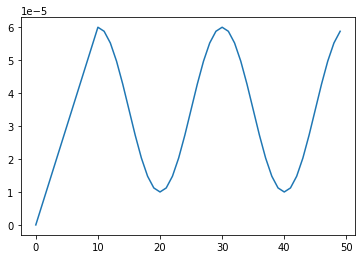

In [16]:
import matplotlib.pyplot as plt
import torch
from torchvision.models import resnet50
from math import cos, pi
def adjust_learning_rate(optimizer, current_epoch, max_epoch, lr_min=0, lr_max=0.1, warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch+1 / warmup_epoch
    elif current_epoch < max_epoch:
        lr = lr_min + (lr_max - lr_min) * (1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    else:
        lr = lr_min + (lr_max - lr_min) * (1 + cos(pi * (current_epoch - max_epoch) / (max_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr


model = resnet50(pretrained=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr = 3e-5
lr_max = lr * 2
lr_min = lr / 3
max_epoch = 10
lrs = []
for epoch in range(50):
    adjust_learning_rate(optimizer=optimizer, current_epoch=epoch, max_epoch=max_epoch, lr_min=lr_min, lr_max=lr_max, warmup=True)
    # print(optimizer.param_groups[0]['lr'])
    lrs.append(optimizer.param_groups[0]["lr"])
    optimizer.step()
plt.plot(lrs)
plt.savefig('lr.jpg',bbox_inches='tight')
